In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
tickers_list = ['ABBV','ACAD','AKRO','ALKS','ALNY','AMGN','FOLD','AMPH','AXSM','BIIB','BMRN','BMY','CAH','CTLT','CRL','ELAN','EXAS','EXEL','GILD','GH','HALO','ILMN','IMGN','INCY','ITCI','IONS','JAZZ','JNJ','KRYS','LLY','MEDP','MRK','MRNA','MLTX','MORF','NBIX','PACB','PRGO','PFE','PBH','REGN','RVMD','ROIV','SRPT','UTHR','PCVX','VRTX','VTRS','ZTS','ATNF',
                'AVIR','BCYC','INSM','ANAB','AMGN','HRMY','ALPN','ANIP','PHAT','LEGN','NVCR','PACB','KRTX','ALEC','INBX','TWST','MRNS','SNDX','CGEM','ALVR','EDIT','FOLD','COLL','ARQT','GBIO','FULC','EOLS','DYN','CCCC','FTXH','GH','SNY','LGND','PCRX','PLRX','OPTN','GOSS','SGEN','EXEL','FHTX','LXRX','HROW','AVDL','CVAC','CBAY','NTLA','XENE','MNKD','MDGL','MRUS','SGMO']
data = yf.download(tickers_list,'2021-01-01', '2023-09-01')['Adj Close']
raw_data = data.resample('W').last()
print(raw_data.head())

[*********************100%%**********************]  96 of 96 completed
                  ABBV       ACAD       AKRO       ALEC       ALKS  \
Date                                                                 
2021-01-10   95.644104  53.130001  28.889999  15.400000  20.379999   
2021-01-17   99.694397  53.660000  29.240000  16.870001  22.370001   
2021-01-24  100.001114  52.830002  31.059999  16.590000  22.190001   
2021-01-31   92.441940  48.049999  29.420000  16.840000  20.990000   
2021-02-07   98.079750  51.700001  31.450001  20.760000  22.330000   

                  ALNY   ALPN       ALVR        AMGN       AMPH  ...   SGMO  \
Date                                                             ...          
2021-01-10  146.660004  13.44  42.970001  218.442291  19.799999  ...  16.98   
2021-01-17  166.360001  13.16  44.930000  224.853867  18.690001  ...  15.75   
2021-01-24  172.380005  13.12  42.689999  232.190506  18.700001  ...  14.95   
2021-01-31  150.479996  12.87  36.570000  2

In [47]:
empty_columns = raw_data.columns[raw_data.isna().any()].tolist()
print(empty_columns)

[]


In [48]:
print(len(raw_data), len(raw_data.columns))
#after dropping the stocks with empty datapoints, we have 139 weekly data points for 96 stocks respectively

139 96


In [49]:
# now we rescale the data to log difference format
def LogDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    x_diff = x_diff.dropna()
    return x_diff

In [50]:
return_data = LogDiff(raw_data)
print(return_data.head())

                ABBV      ACAD      AKRO       ALEC      ALKS       ALNY  \
Date                                                                       
2021-01-17  4.147542  0.992608  1.204213   9.116946  9.316683  12.603711   
2021-01-24  0.307185 -1.558860  6.038317  -1.673683 -0.807905   3.554725   
2021-01-31 -7.860055 -9.483713 -5.424608   1.495690 -5.559564 -13.587121   
2021-02-07  5.920015  7.321568  6.672429  20.927105  6.188494   9.278177   
2021-02-14 -4.025525 -3.083814 -0.958477   1.387245 -9.925888  -4.452336   

                ALPN       ALVR      AMGN      AMPH  ...      SGMO       SNDX  \
Date                                                 ...                        
2021-01-17 -2.105339   4.460350  2.892884 -5.769325  ... -7.519579   0.718972   
2021-01-24 -0.304414  -5.114106  3.210747  0.053491  ... -5.212908 -15.957342   
2021-01-31 -1.923876 -15.473644 -4.878407 -2.820146  ... -9.023944  -0.943631   
2021-02-07  1.847626  17.811990 -2.139277  4.779430  ...  6.92

In [51]:
# after rescaling the data, we see the data information
summary_result = return_data.describe()
print(summary_result)

             ABBV        ACAD        AKRO        ALEC        ALKS        ALNY  \
count  138.000000  138.000000  138.000000  138.000000  138.000000  138.000000   
mean     0.311251   -0.489974    0.392101   -0.752719    0.260342    0.216841   
std      3.057822    8.589526   11.062404   10.666893    4.764237    7.032031   
min     -7.860055  -59.409476  -20.103572  -31.000238  -23.491719  -22.441687   
25%     -1.384420   -4.146621   -4.832116   -7.106168   -2.739403   -3.215059   
50%      0.557097   -0.087747   -0.895453   -0.906286    0.350564    0.454061   
75%      2.168801    3.236657    3.960613    3.902678    3.366787    3.294780   
max      9.683418   27.676203   79.842231   50.403246   10.981490   43.104343   

             ALPN        ALVR        AMGN        AMPH  ...        SGMO  \
count  138.000000  138.000000  138.000000  138.000000  ...  138.000000   
mean    -0.061289   -1.898166    0.115930    0.717712  ...   -2.074272   
std      8.128861   11.670168    2.977475    5.9

In [100]:
# Assuming 'PACD' and 'VAIR' are columns in your DataFrame
column_names = ['PACB', 'AVIR']

# Use describe() on the selected columns
statistics = return_data[column_names].describe()

# Print the descriptive statistics for the selected columns
print(statistics)


             PACB        AVIR
count  137.000000  137.000000
mean    -0.865491   -2.019430
std     12.406013   14.244929
min    -34.187839 -112.675408
25%     -7.410796   -5.715842
50%     -1.510967   -1.122914
75%      5.282515    2.706523
max     37.190492   29.648784


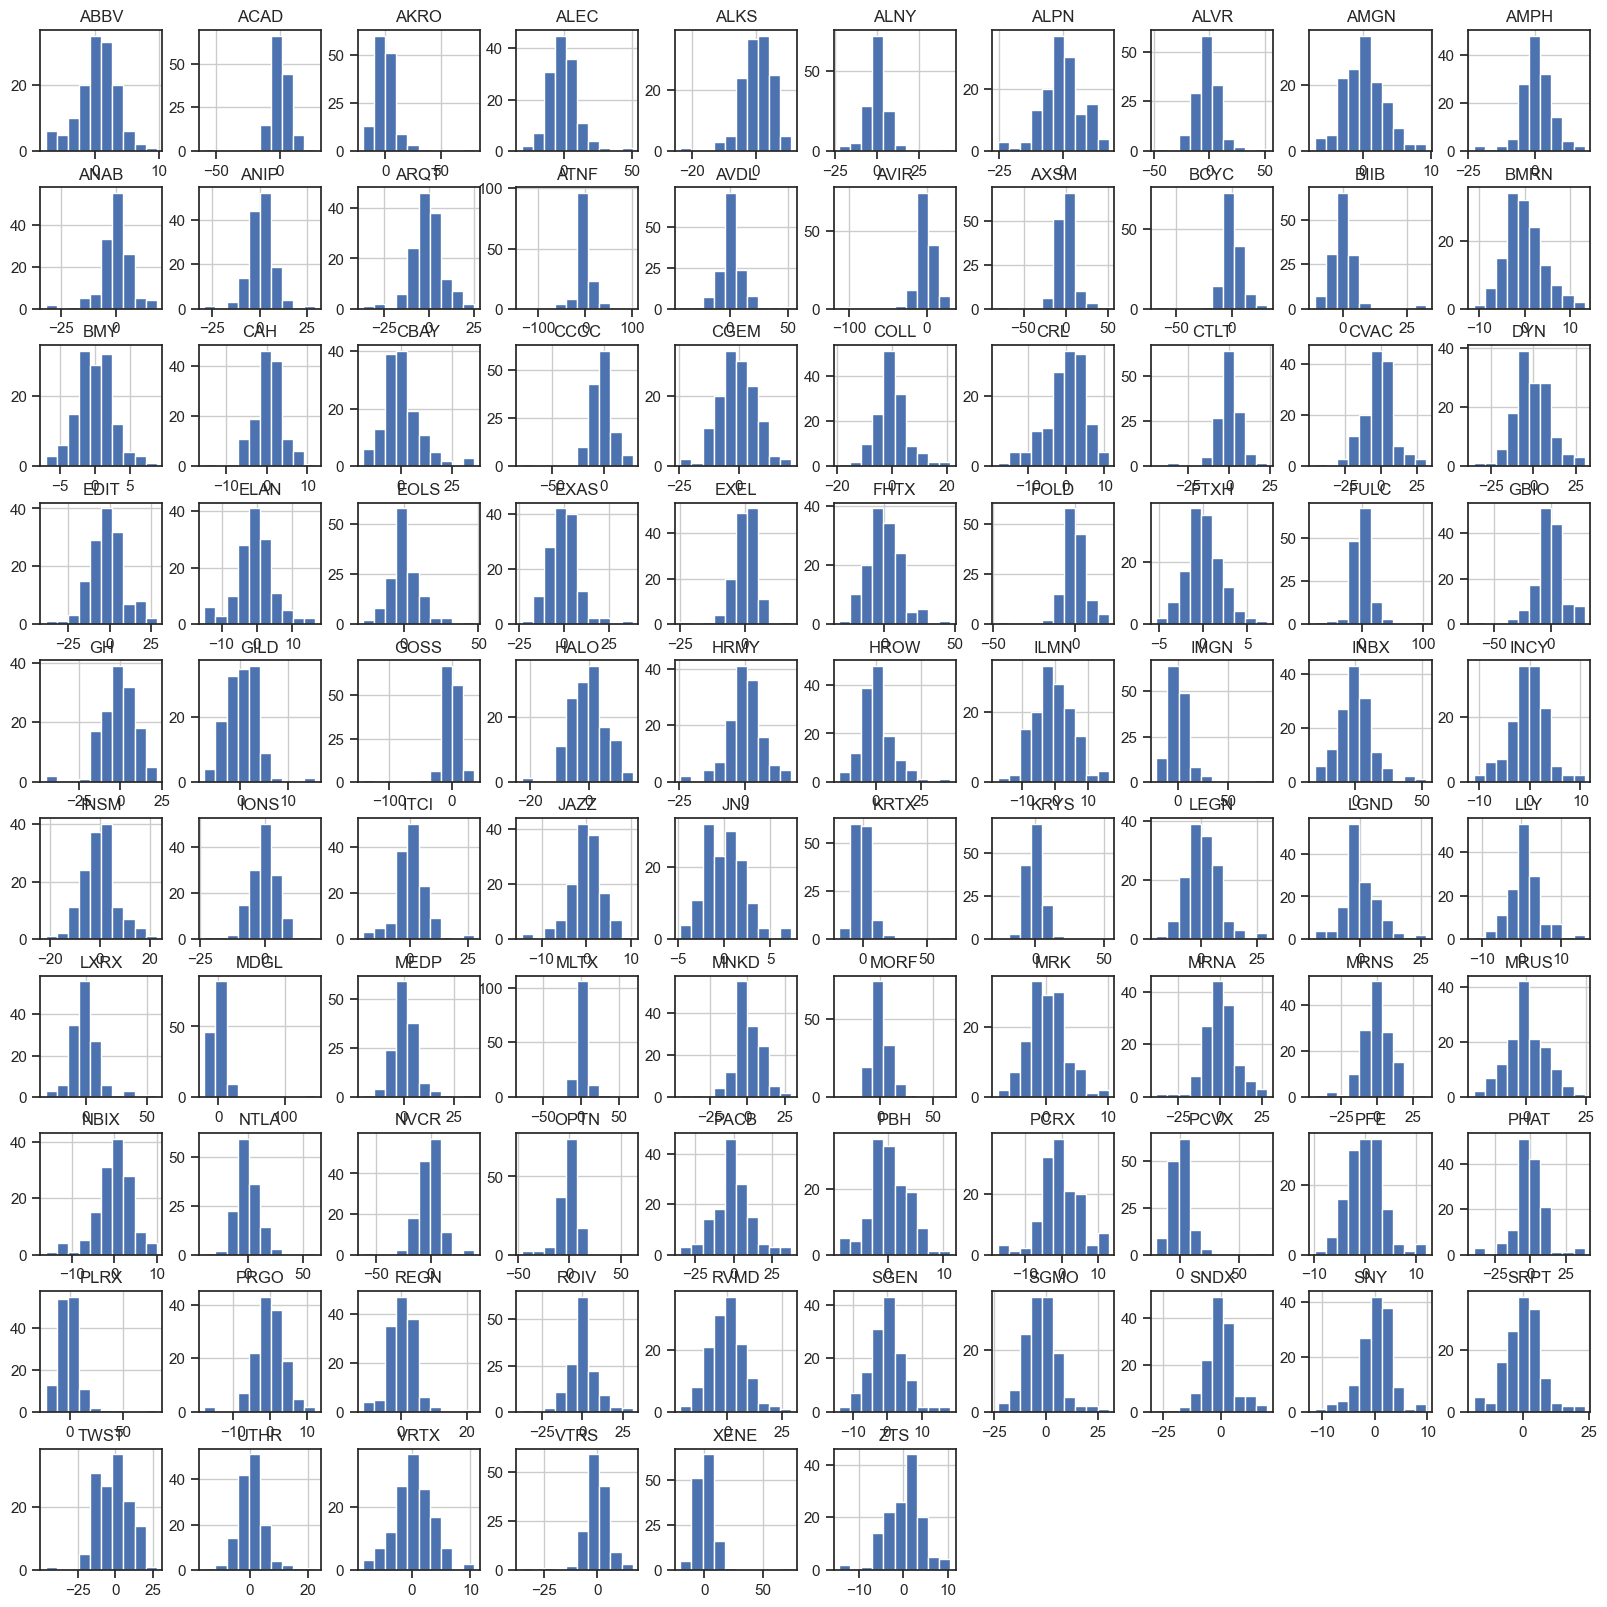

In [59]:
return_data.hist(bins=10,figsize=(20,20))
plt.show()

In [60]:
# import seaborn as sns

# sns.set(style="ticks")
# sns.pairplot(return_data, hue="Outcome")

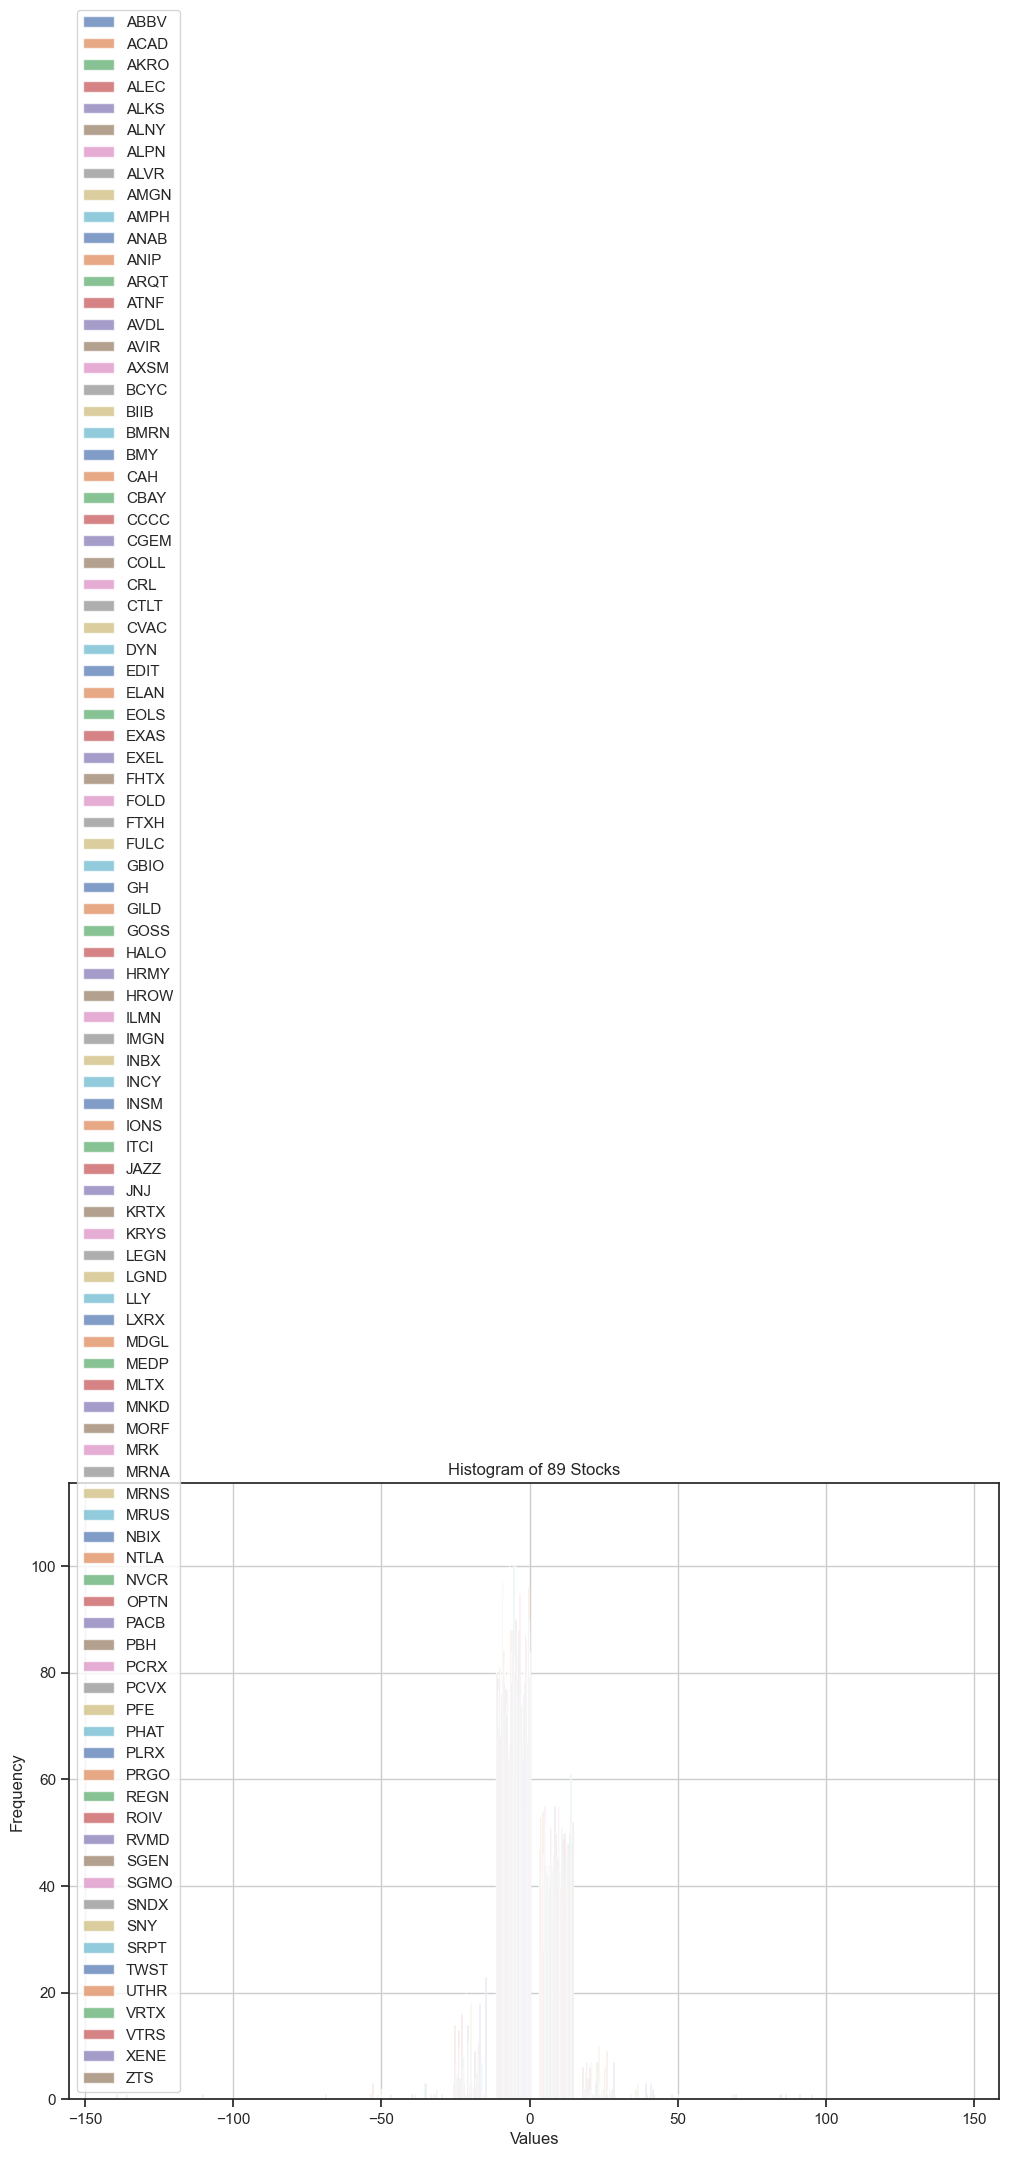

In [61]:
# here, we try to plot the graph and histogram to see the general trend 
plt.figure(figsize=(12, 8))
plt.hist(return_data.values, bins=20, alpha=0.7, label=return_data.columns)
plt.title('Histogram of 89 Stocks')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

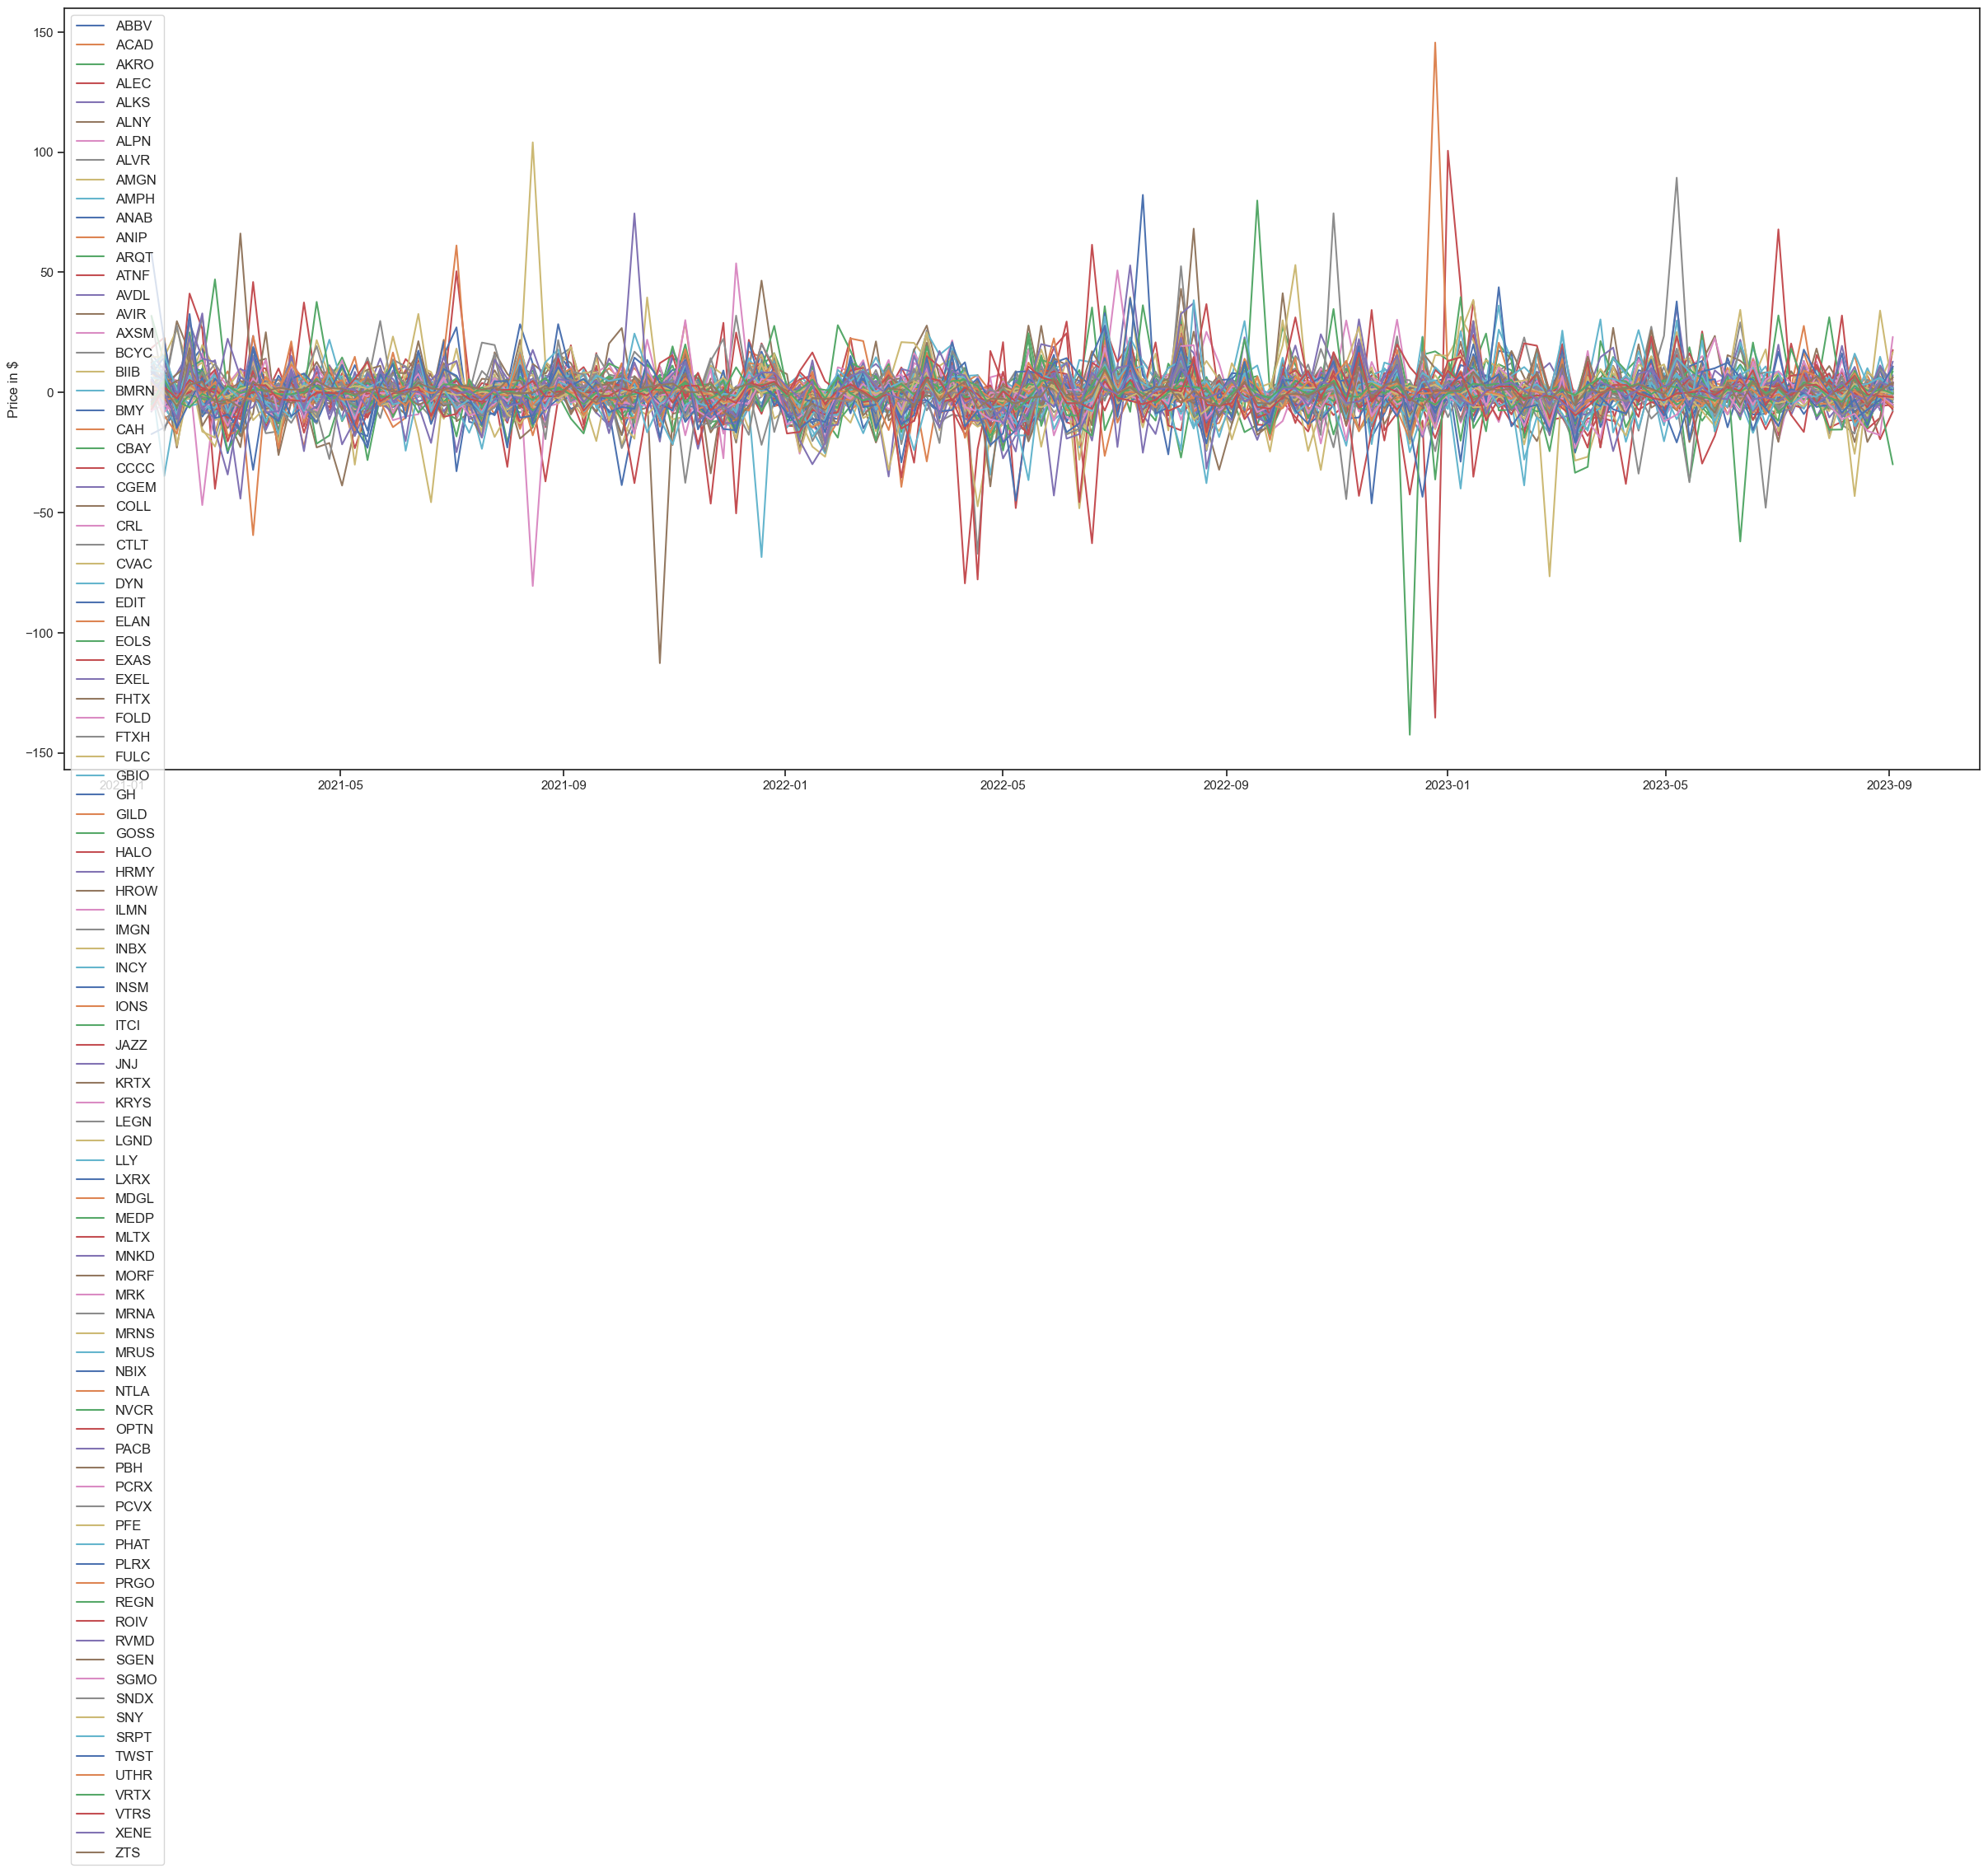

In [62]:
plt.figure(figsize=(30, 12))
for i in range(return_data.shape[1]):
    plt.plot(return_data.iloc[:,i], label=return_data.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in $')
plt.show()

<Axes: >

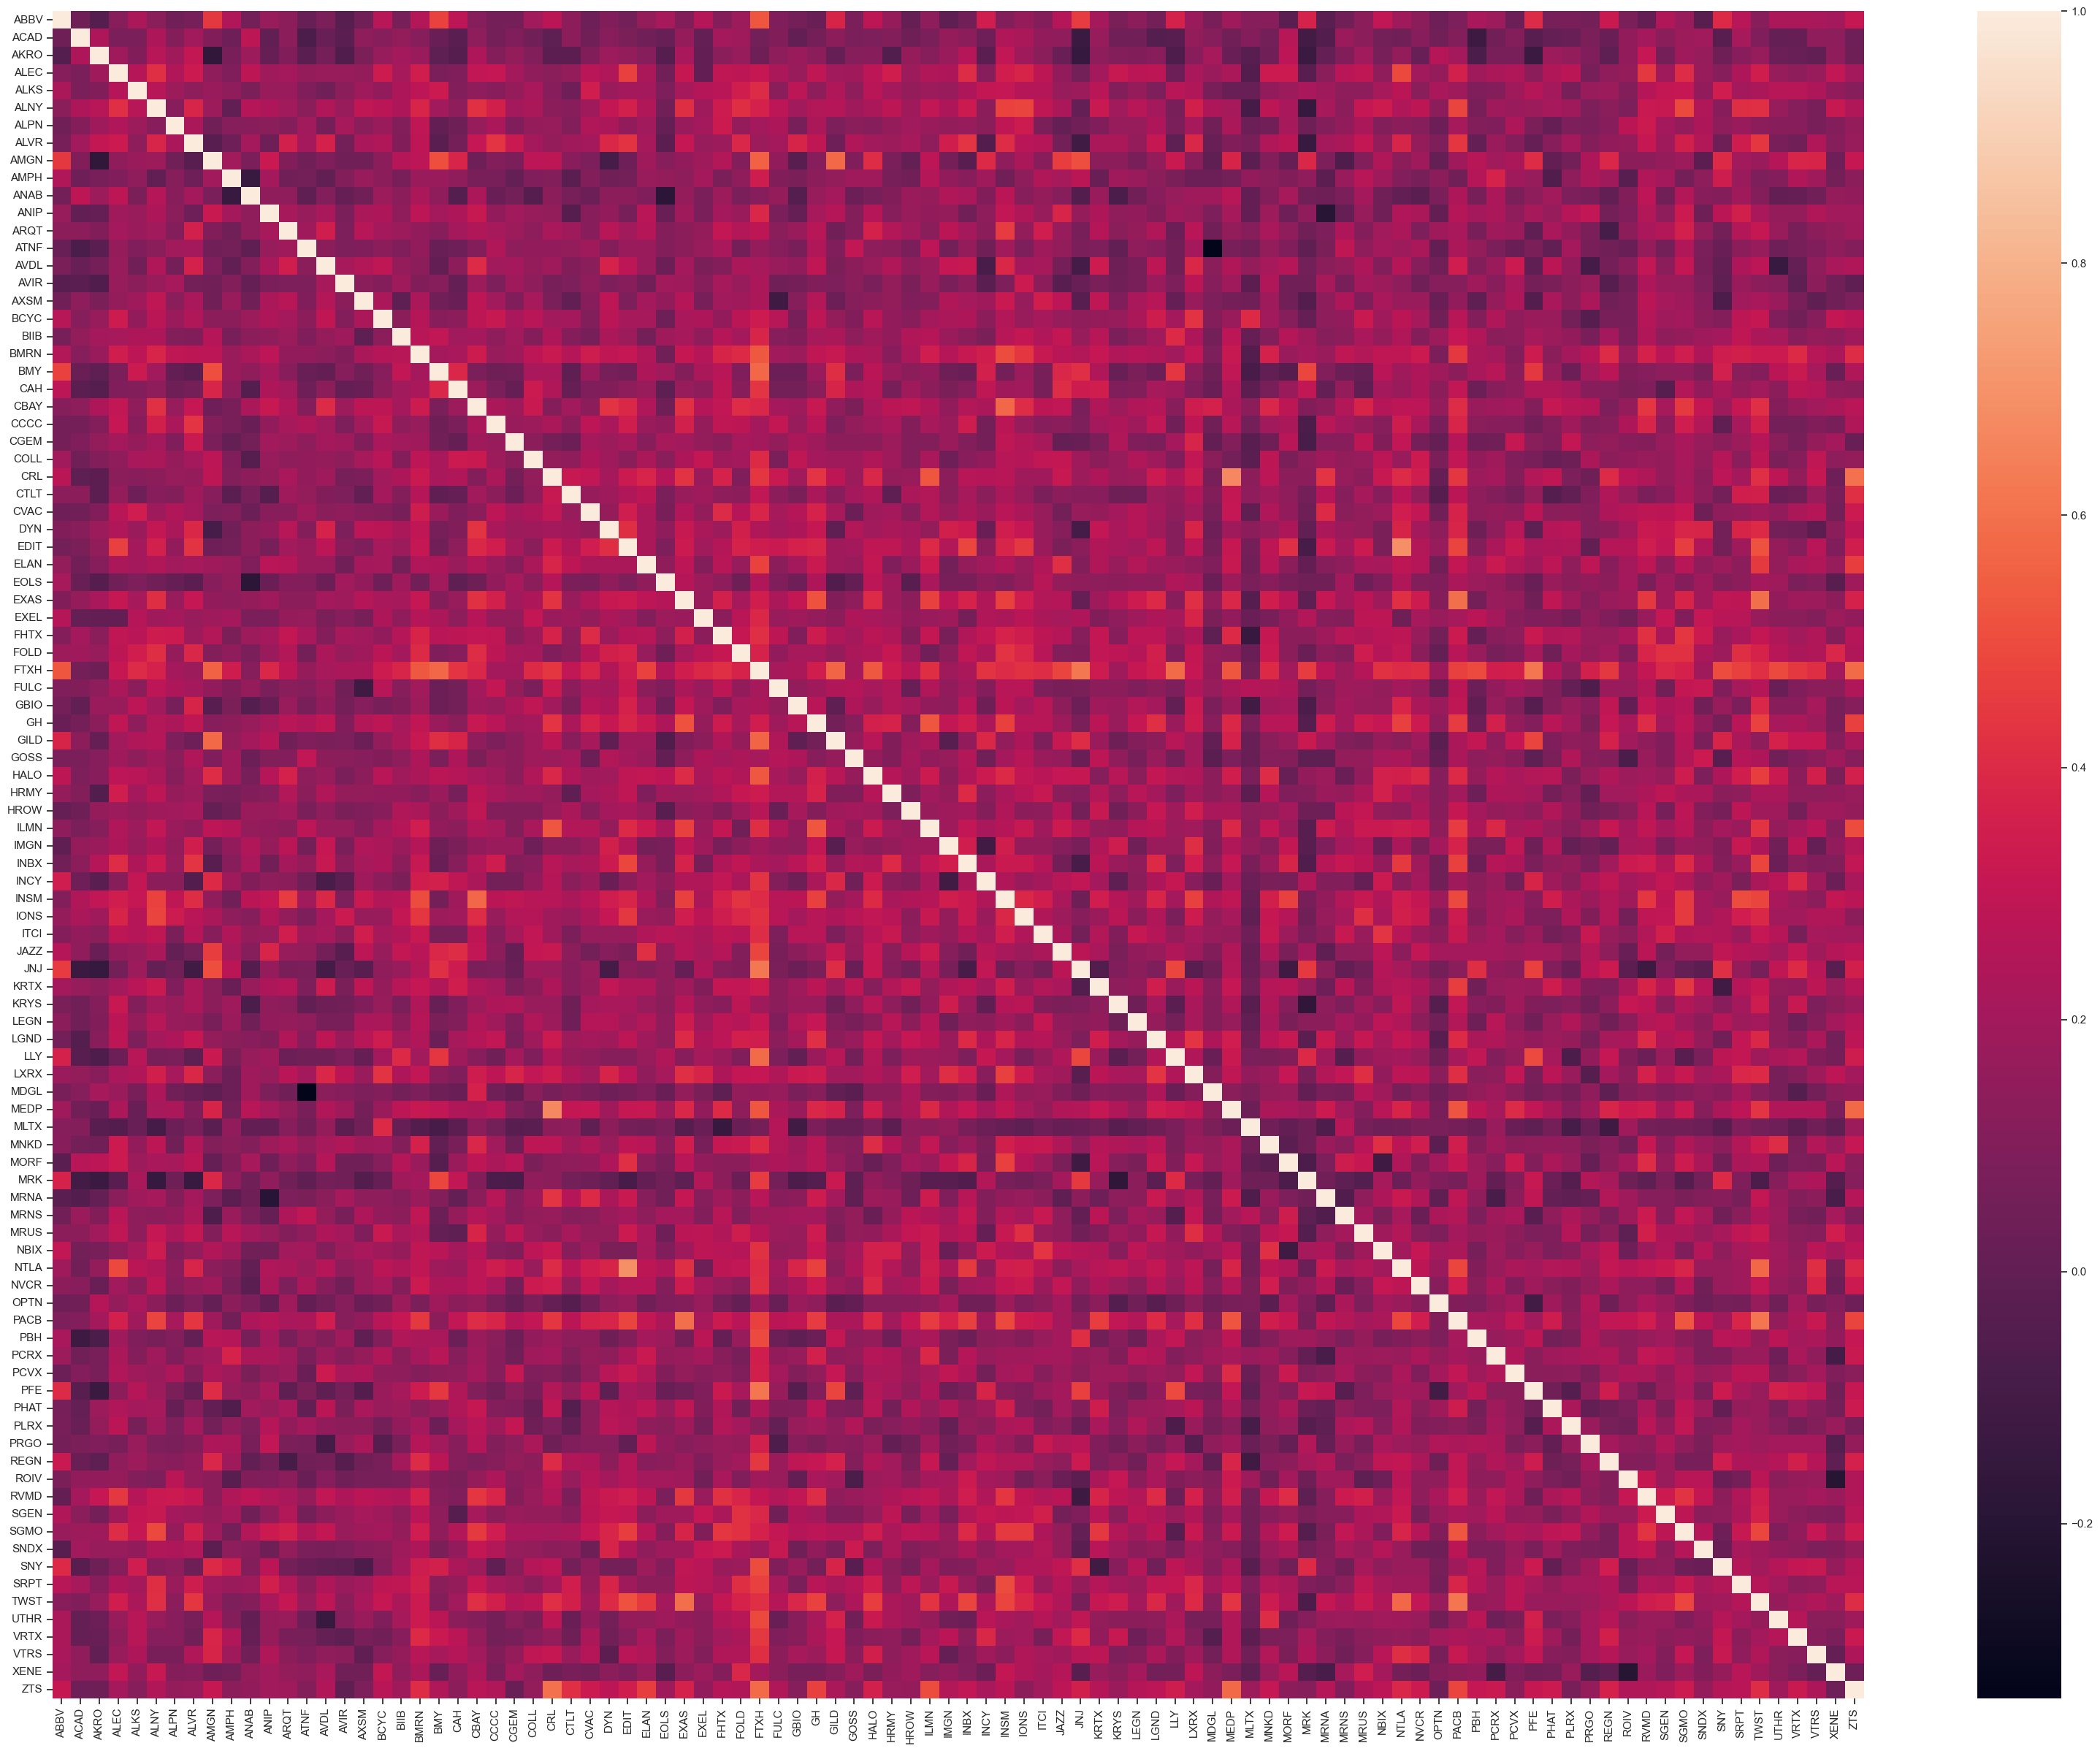

In [63]:
# correlation matrix
plt.subplots(figsize = (40,30))
sns.heatmap(return_data.corr())

In [64]:
# to calculate the beta, we utilize a 0.02 risk free rate and use Nasdaq index as the market return

import statsmodels.api as sm
risk_free_rate = 0.02

# market return dataframe
market_returns = yf.download('IXIC', '2021-01-01', '2023-09-01')['Adj Close']
weekly_data = data.resample('W').last()
print(weekly_data.head())

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IXIC']: Exception('%ticker%: No timezone found, symbol may be delisted')



                 ZTS        ABBV       ACAD       AKRO       ALEC       ALKS  \
Date                                                                           
2021-01-17 -3.974206   99.694397  53.660000  29.240000  16.870001  22.370001   
2021-01-24  1.244489  100.001114  52.830002  31.059999  16.590000  22.190001   
2021-01-31 -5.719820   92.441940  48.049999  29.420000  16.840000  20.990000   
2021-02-07  3.208899   98.079750  51.700001  31.450001  20.760000  22.330000   
2021-02-14  4.559211   94.209938  50.130001  31.150000  21.049999  20.219999   

                  ALNY   ALPN       ALVR        AMGN  ...   SGMO       SNDX  \
Date                                                  ...                     
2021-01-17  166.360001  13.16  44.930000  224.853867  ...  15.75  23.730000   
2021-01-24  172.380005  13.12  42.689999  232.190506  ...  14.95  20.230000   
2021-01-31  150.479996  12.87  36.570000  221.135162  ...  13.66  20.040001   
2021-02-07  165.110001  13.11  43.700001  2

In [65]:
num_stocks = 96
# Create an empty DataFrame to store beta values
beta_df = pd.DataFrame(columns=['Stock', 'Beta'])

# Calculate beta for each stock
for column in return_data.columns:
    # Combine stock returns and market returns into a DataFrame
    data = pd.concat([return_data[column], weekly_data], axis=1).dropna()
    
    # Perform linear regression to calculate beta
    X = sm.add_constant(data.iloc[:, 1])  # Market returns (independent variable)
    y = data.iloc[:, 0]  # Stock returns (dependent variable)
    model = sm.OLS(y, X).fit()
    
    beta = model.params[1]  # Beta coefficient from the regression
    
    # Append the stock symbol and its beta to the DataFrame
    beta_df = beta_df.append({'Stock': column, 'Beta': beta}, ignore_index=True)

# 'beta_df' now contains the beta values for each stock

/var/folders/tx/g60nt6h50yzbjg3s070m_3sr0000gn/T/ipykernel_1154/1159486433.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beta_df = beta_df.append({'Stock': column, 'Beta': beta}, ignore_index=True)
/var/folders/tx/g60nt6h50yzbjg3s070m_3sr0000gn/T/ipykernel_1154/1159486433.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beta_df = beta_df.append({'Stock': column, 'Beta': beta}, ignore_index=True)
/var/folders/tx/g60nt6h50yzbjg3s070m_3sr0000gn/T/ipykernel_1154/1159486433.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  beta_df = beta_df.append({'Stock': column, 'Beta': beta}, ignore_index=True)
/var/folders/tx/g60nt6h50yzbjg3s070m_3sr0000gn/T/ipykernel_1154/1159486433.py:18: FutureWarning: The frame.append meth

In [66]:
print(beta_df.head())

  Stock      Beta
0  ABBV  0.241352
1  ACAD  0.081022
2  AKRO  0.098012
3  ALEC  0.560996
4  ALKS  0.135237


In [67]:
print(beta_df['Beta'].idxmax())
print(beta_df['Beta'].idxmin())

74
15


In [96]:
print(beta_df.iloc[74], '\n', beta_df.iloc[15])
#here returns the stock with the highest beta and lowest beta

Stock        PACB
Beta     1.490914
Name: 74, dtype: object 
 Stock        AVIR
Beta    -0.024089
Name: 15, dtype: object


In [69]:
# With the information provided above, we try to plot the efficient frontier and find the minimum variance portfolio
# to do this, we need the mean values of each stock and the covariance matrix 
mean_returns = return_data.mean(axis = 0) * 52
cov_matrix = np.cov(mean_returns.T)

num_assets = 96
num_portfolios = 10000


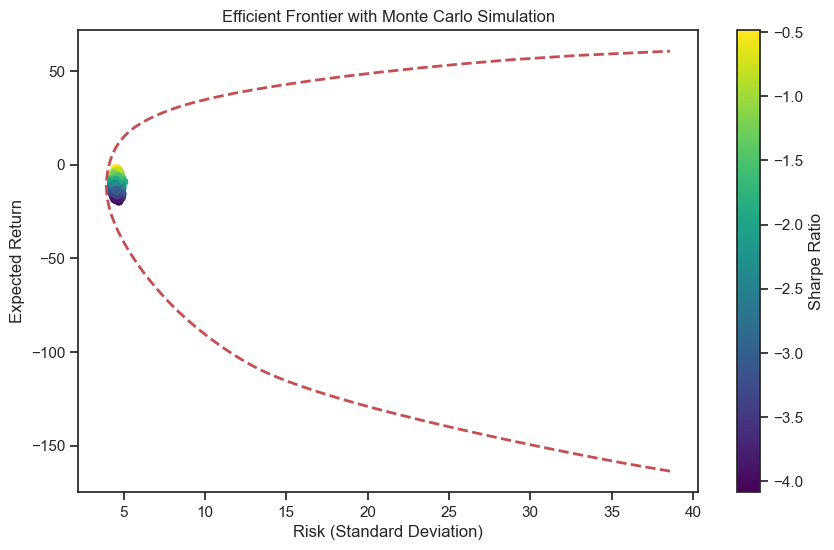

In [70]:
# here, we plot the efficient frontier
from scipy.optimize import minimize
# Generate random portfolio weights for Monte Carlo Simulation
np.random.seed(42)
portfolio_weights = np.random.random((num_portfolios, num_assets))
portfolio_weights /= portfolio_weights.sum(axis=1, keepdims=True)  # Ensure weights sum to 1

# Initialize lists to store portfolio statistics
portfolio_returns = []
portfolio_risks = []

# Perform Monte Carlo Simulation to calculate portfolio returns and risks
for i in range(num_portfolios):
    weights = portfolio_weights[i]
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    portfolio_returns.append(portfolio_return)
    portfolio_risks.append(portfolio_risk)

# Create a DataFrame to store the results
portfolio_data = pd.DataFrame({'Return': portfolio_returns, 'Risk': portfolio_risks})

# Define the optimization function for portfolio optimization
def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def portfolio_return(weights):
    return np.sum(weights * mean_returns)

# Initialize lists to store optimized portfolio statistics
optimal_weights = []
optimal_returns = []
optimal_risks = []

# Perform portfolio optimization for different target returns
target_returns = np.linspace(min(mean_returns), max(mean_returns), 100)

for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of weights equals 1
                   {'type': 'eq', 'fun': lambda x: portfolio_return(x) - target_return})  # Target return constraint
    initial_weights = num_assets * [1. / num_assets]  # Initial weights (equally weighted)
    
    result = minimize(portfolio_risk, initial_weights, method='SLSQP', bounds=((0, 1),) * num_assets, constraints=constraints)
    
    optimal_weights.append(result.x)
    optimal_returns.append(portfolio_return(result.x))
    optimal_risks.append(portfolio_risk(result.x))

# Create a DataFrame to store the efficient frontier
efficient_frontier_data = pd.DataFrame({'Return': optimal_returns, 'Risk': optimal_risks})

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_data['Risk'], portfolio_data['Return'], c=portfolio_data['Return'] / portfolio_data['Risk'], marker='o', cmap='viridis')
plt.plot(efficient_frontier_data['Risk'], efficient_frontier_data['Return'], 'r--', linewidth=2)
plt.title('Efficient Frontier with Monte Carlo Simulation')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


In [73]:
# here, we try to apply a linear regression model with expected return as target variable and all stocks as explanatory variables 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [80]:
# rescale the data to same dimension and check that
y = mean_returns.iloc[1:]
x = return_data.iloc[:95, 1:]

print("Dimensions of X:", x.shape)
print("Dimensions of y:", y.shape)


Dimensions of X: (95, 95)
Dimensions of y: (95,)


In [82]:
# create the test and train variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# build the regression model and fit it to the training data
model = LinearRegression()
model.fit(x_train, y_train)

# make predictions: use the trained model to make predictions on test data
y_pred = model.predict(x_test)

# evaluate the model by using the metrics of Mean Squared Error and R-squared 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4488.776179834917
R-squared: -1.2428629999225178


In [90]:
return_data.to_excel('output.xlsx', index=False)

In [101]:
# since not many stocks follow a Normal Distribution, assuming an OLS model would be nonsense. 
# To further and accurately perform the risk analysis, we use copula to connect each stock

# from copulas.bivariate import Clayton
# from copulas.multivariate import GaussianMultivariate


# # Create univariate copula models for each variable (stock return)
# univariate_copulas = [Clayton() for _ in range(len(return_data.columns))]

# # Fit univariate copula models to each variable
# for i, col in enumerate(return_data.columns):
#     data_col = np.array(return_data[col]).reshape(-1, 1)
#     print(f"Shape of data_col for column '{col}': {data_col.shape}")
#     univariate_copulas[i].fit(data_col)
#     print(f"Univariate copula for column '{col}' fitted successfully.")

    

# # Create a multivariate copula model
# multivariate_copula = GaussianMultivariate()

# # Assign the univariate copula models to the multivariate copula
# multivariate_copula.copulas = univariate_copulas

# # Fit the multivariate copula to your data
# multivariate_copula.fit(return_data)

# # Generate synthetic data
# synthetic_data = multivariate_copula.sample(len(return_data))




In [124]:
new_tickers = ['NBI','NDX','FTXH']
new_data = yf.download(new_tickers, '2021-01-01', '2023-09-01')['Adj Close']
new_data = new_data.resample('W').last()
print(new_data.head())

[*********************100%%**********************]  3 of 3 completed
                 FTXH          NBI           NDX
Date                                            
2021-01-10  25.528940  4970.569824  13105.200195
2021-01-17  25.819042  5081.040039  12803.929688
2021-01-24  25.756184  5183.270020  13366.400391
2021-01-31  25.248508  5056.790039  12925.379883
2021-02-07  25.799702  5315.029785  13603.959961


In [112]:
new_data.isnull().values.any()

False

In [117]:
from copulas.multivariate import GaussianMultivariate
copula = GaussianMultivariate()
copula.fit(new_data)

synthetic_data = copula.sample(len(new_data))

print(new_data.shape)
print(synthetic_data.shape)

print(new_data.columns)
print(synthetic_data.columns)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


(139, 3)
(139, 3)
Index(['FTXH', 'NBI', 'NDX'], dtype='object')
Index(['FTXH', 'NBI', 'NDX'], dtype='object')


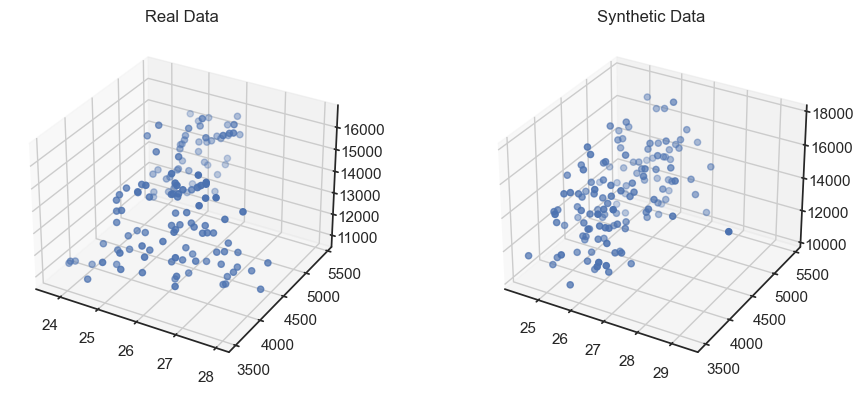

In [119]:
from copulas.visualization import compare_3d

compare_3d(new_data, synthetic_data)

In [121]:
import pandas as pd
import numpy as np
from scipy import stats

# Sample data (replace this with your actual data)

new_data = {
            'Date': pd.date_range(start='2021-01-01', periods=139, freq='W'),
            'NBI': new_data['NBI'],
            'NDX': new_data['NDX'],
            'FTXH': new_data['FTXH']
}

# Create a DataFrame
df = pd.DataFrame(new_data)

# Split the data into two segments (before and after the break)
break_date = '2021-04-01'  # Adjust this date as needed
segment1 = df[df['Date'] <= break_date]
segment2 = df[df['Date'] > break_date]

# Define the dependent variable (y) and independent variables (X1 and X2)
y1 = segment1['NDX']
X1_1 = segment1[['NBI', 'FTXH']]
y2 = segment2['NDX']
X1_2 = segment2[['NBI', 'FTXH']]

# Perform linear regression for each segment
slope1, intercept1, _, _, _ = stats.linregress(X1_1, y1)
slope2, intercept2, _, _, _ = stats.linregress(X1_2, y2)

# Calculate the Chow test statistic
numerator = ((y1 - (slope1 * X1_1 + intercept1)) ** 2).sum() + ((y2 - (slope2 * X1_2 + intercept2)) ** 2).sum()
denominator = ((y1 - (y1.mean())) ** 2).sum() + ((y2 - (y2.mean())) ** 2).sum()
chow_statistic = (numerator / denominator) * ((len(y1) + len(y2) - 4) / 2)

# Define the significance level
alpha = 0.05

# Calculate the critical value from an F-distribution
df1 = 2  # Degrees of freedom for the numerator
df2 = len(y1) + len(y2) - 4  # Degrees of freedom for the denominator
critical_value = stats.f.ppf(1 - alpha, df1, df2)

# Perform the Chow test
if chow_statistic > critical_value:
    result = "Reject the null hypothesis. There is a structural break."
else:
    result = "Fail to reject the null hypothesis. There is no structural break."

# Print the results
print("Chow Statistic:", chow_statistic)
print("Critical Value:", critical_value)
print("Result:", result)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 13